1\. **Pandas DataFrame**

This exercise consists in analyzing a dataset containg timing information from a series of Time-to-Digital-Converters (TDC) implemented in a pair of FPGAs. Each measurement (i.e. each row of the input file) consists of a flag that specifies the type of message ('HEAD', which in this case is always 1), two addresses of the TDC providing the signal ('FPGA' and 'TDC_CHANNEL'), and the timing information ('ORBIT_CNT', 'BX_COUNTER', and 'TDC_MEAS'). Each TDC count corresponds to 25/30 ns, whereas a unit of BX_COUNTER corresponds to 25 ns, and the ORBIT_CNT is increased every `x` BX_COUNTER. This allows to store the time in a similar way to hours, minutes and seconds.

In [ ]:
# If haven't downloaded it yet, please get the data file with wget
!wget https://www.dropbox.com/s/xvjzaxzz3ysphme/data_000637.txt -P ./data/

--2022-11-19 10:18:07--  https://www.dropbox.com/s/xvjzaxzz3ysphme/data_000637.txt
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/xvjzaxzz3ysphme/data_000637.txt [following]
--2022-11-19 10:18:08--  https://www.dropbox.com/s/raw/xvjzaxzz3ysphme/data_000637.txt
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucde4d7e892075e23536cc66b703.dl.dropboxusercontent.com/cd/0/inline/BxA4Nqts0CbdjWrd1G721vqY6kMJdudu09AvrzC0G73AEjYG1B0hmBWM5Q2yMNTQcbzKfgN6hbejcS7ChQlifgzMY0TP9TREG2uGVg609hx_1L0KObrG1CYD_MlQNwU8wLNPitrAV65RErdOu0-ERO_c6Jc6_jMhiGFCXU8ojYKGmw/file# [following]
--2022-11-19 10:18:08--  https://ucde4d7e892075e23536cc66b703.dl.dropboxusercontent.com/cd/0/inline/BxA4Nqts0CbdjWrd1G721vqY6kMJdudu09AvrzC0G73AEjYG1B0hmBWM5Q2yMNTQcbzKfgN

1\. Create a Pandas DataFrame reading N rows of the `data/data_000637.txt` dataset. Choose N to be smaller than or equal to the maximum number of rows and larger that 10k (check the documentation).

In [ ]:
import pandas as pd
filename= "./data/data_000637.txt"
n=9000 
pandas_dataframe= pd.read_csv(filename,nrows=n)
print(pandas_dataframe)


      HEAD  FPGA  TDC_CHANNEL   ORBIT_CNT  BX_COUNTER  TDC_MEAS
0        1     0          123  3869200167        2374        26
1        1     0          124  3869200167        2374        27
2        1     0           63  3869200167        2553        28
3        1     0           64  3869200167        2558        19
4        1     0           64  3869200167        2760        25
...    ...   ...          ...         ...         ...       ...
8995     1     0           16  3869200257         966         7
8996     1     0           61  3869200257        1144        12
8997     1     0           57  3869200257        1145         3
8998     1     0           60  3869200257        1145        21
8999     1     0          139  3869200257        1153         0

[9000 rows x 6 columns]


2\. Estimate the number of BX in a ORBIT (the value `x`).

*Hint*: check when the BX counter reaches the maximum value before being reset to 0.

In [ ]:
x=pandas_dataframe["BX_COUNTER"].max()
print("MAXIMUM OF BX_COUNTER ==>>",x)


MAXIMUM OF BX_COUNTER ==>> 3563


3\. Create a new column with the absolute time in ns (as a combination of the other three columns with timing information) since the beginning of the data acquisition, and convert the new column to a Time Series.

In [ ]:
import datetime

absolute_times=[]
for a,row in pandas_dataframe.iterrows():
    timing= (row["TDC_MEAS"]+ row["BX_COUNTER"]+ row["ORBIT_CNT"])
    absolute_times.append(timing)

pandas_dataframe["ABS_TIMES"]=absolute_times
print("NEW COLUMN ==>>\n",pandas_dataframe)

time_series=pd.to_datetime(pandas_dataframe["ABS_TIMES"], unit="ns")
print("TIME SERIES ==>>\n",time_series)


NEW COLUMN ==>>
          HEAD  FPGA  TDC_CHANNEL   ORBIT_CNT  BX_COUNTER  TDC_MEAS  \
0           1     0          123  3869200167        2374        26   
1           1     0          124  3869200167        2374        27   
2           1     0           63  3869200167        2553        28   
3           1     0           64  3869200167        2558        19   
4           1     0           64  3869200167        2760        25   
...       ...   ...          ...         ...         ...       ...   
1310715     1     0           62  3869211171         762        14   
1310716     1     1            4  3869211171         763        11   
1310717     1     0           64  3869211171         764         0   
1310718     1     0          139  3869211171         769         0   
1310719     1     0           61  3869211171         762        18   

                         ABS_TIME   ABS_TIMES  
0       0 days 00:00:03.869202567  3869202567  
1       0 days 00:00:03.869202568  3869202568 

4\. Find out the duration of the data taking in hours, minutes and seconds, by using the features of the Time Series. Perform this check reading the whole dataset.

In [ ]:
pandas_dataframe= pd.read_csv(filename)
absolute_times=[]
for a,row in pandas_dataframe.iterrows():
    timing= (row["TDC_MEAS"]+ row["BX_COUNTER"]+ row["ORBIT_CNT"])
    absolute_times.append(timing)
    
pandas_dataframe["ABS_TIME"]= pd.to_timedelta(absolute_times)
print("DURATION ==>>\n",pandas_dataframe.head(30))


DURATION ==>>
     HEAD  FPGA  TDC_CHANNEL   ORBIT_CNT  BX_COUNTER  TDC_MEAS  \
0      1     0          123  3869200167        2374        26   
1      1     0          124  3869200167        2374        27   
2      1     0           63  3869200167        2553        28   
3      1     0           64  3869200167        2558        19   
4      1     0           64  3869200167        2760        25   
5      1     0           63  3869200167        2762         4   
6      1     0           61  3869200167        2772        14   
7      1     0          139  3869200167        2776         0   
8      1     0           62  3869200167        2774        21   
9      1     0           60  3869200167        2788         7   
10     1     1            7  3869200167        2785         4   
11     1     0           64  3869200167        2786        19   
12     1     1            6  3869200167        2792        18   
13     1     0           36  3869200167        2791        23   
14     1  

5\. Use the `.groupby()` method to find out the noisy channels, i.e. the TDC channels with most counts (print to screen the top 3 and the corresponding counts)

In [ ]:
counting=pandas_dataframe.groupby("TDC_CHANNEL").count()
n=3  
noisy_channels=counting.sort_values(by="HEAD",ascending=False).iloc[0:n]
print(noisy_channels)


               HEAD    FPGA  ORBIT_CNT  BX_COUNTER  TDC_MEAS  ABS_TIME
TDC_CHANNEL                                                           
139          108059  108059     108059      108059    108059    108059
64            66020   66020      66020       66020     66020     66020
63            64642   64642      64642       64642     64642     64642


6\. Count the number of non-empty orbits (i.e. the number of orbits with at least one hit).

In [ ]:
print("THE NUMBER OF NON-EMPTY ORBITS ARE ==>>",len(pandas_dataframe.groupby("ORBIT_CNT").count()))


THE NUMBER OF NON-EMPTY ORBITS ARE ==>> 11001


7\. Count the number of unique orbits with at least one measurement from TDC_CHANNEL=139.

In [ ]:
print("THE UNIQUE ORBITS WITH AT LEAST ONE MEASURMENT WITH TDC_CHANNEL=139 ARE ==>>",len(pandas_dataframe[pandas_dataframe["TDC_CHANNEL"]==139].groupby("ORBIT_CNT").count()))


THE UNIQUE ORBITS WITH AT LEAST ONE MEASURMENT WITH TDC_CHANNEL=139 ARE ==>> 10976


8\. Create two Series (one for each FPGA) that have the TDC channel as index, and the number of counts for the corresponding TDC channel as values.

In [ ]:

FPGA1 = pd.Series(pandas_dataframe[pandas_dataframe['FPGA']==1]['TDC_CHANNEL'].value_counts())
print("THE FPGA1 ==>>\n", FPGA1)

FPGA2 = pd.Series(pandas_dataframe[pandas_dataframe['FPGA']==2]['TDC_CHANNEL'].value_counts())
print("THE FPGA2 ==>>\n", FPGA2)

THE FPGA1 ==>>
 2      32669
139    32442
1      28438
4      26403
3      21970
       ...  
9         80
130       38
138       36
137       36
129       35
Name: TDC_CHANNEL, Length: 132, dtype: int64
THE FPGA2 ==>>
 Series([], Name: TDC_CHANNEL, dtype: int64)


9\. **Optional:** Create two histograms (one for each FPGA) that show the number of counts for each TDC channel.

Text(0, 0.5, 'Count')

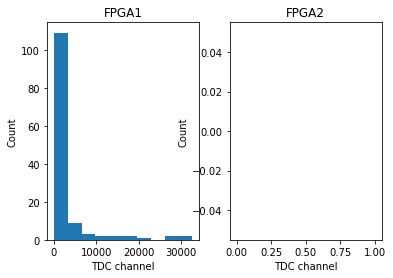

In [ ]:
import matplotlib.pyplot as plt

fig, (ax1, ax2, ) = plt.subplots(1, 2,)

ax1.hist(FPGA1)
ax1.set_title('FPGA1')
ax1.set_xlabel('TDC channel')
ax1.set_ylabel('Count')

ax2.hist(FPGA2)
ax2.set_title('FPGA2')
ax2.set_xlabel('TDC channel')
ax2.set_ylabel('Count')

